Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE

print(transactions.shape)
print(items.shape)
print(item_categories.shape)
print(shops.shape)

print(transactions.head())
print(items.head())
print(item_categories.head())
print(shops.head())

(2935849, 6)
(22170, 3)
(84, 2)
(60, 2)
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4              

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. **What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [5]:
print(transactions.iloc[1,0])

transactions['datetime'] = pd.to_datetime(transactions['date'], format="%d.%m.%Y")
transactions.head()

03.01.2013


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15


In [6]:
split_data = transactions.iloc[0,0]
split_data.split(sep='.', maxsplit=-1)

['02', '01', '2013']

In [7]:
# YOUR CODE GOES HERE

#max_revenue = # PUT YOUR ANSWER IN THIS VARIABLE

import datetime as dt
dttm = transactions['datetime']

elect = transactions[dttm.dt.month_name()=='September'][dttm.dt.year==2014]
elect ['elect'] = elect['item_price'] * elect['item_cnt_day']
max_revenue= elect.groupby('shop_id').sum().max()['elect']

grader.submit_tag('max_revenue', max_revenue)


Current answer for task max_revenue is: 7982852.199999957


C:\Users\PC\AppData\Local\Temp\ipykernel_54776\3136392632.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  elect = transactions[dttm.dt.month_name()=='September'][dttm.dt.year==2014]


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [8]:
# YOUR CODE GOES HERE

# category_id_with_max_revenue = # PUT YOUR ANSWER IN THIS VARIABLE

election = transactions[transactions['datetime'] >= pd.Timestamp('2014-06-01')][transactions['datetime'] <= pd.Timestamp('2014-08-31')]
election ['elect'] = election['item_price'] * election['item_cnt_day']

grooped_item_id = election.groupby('item_id').sum()['elect']

merged = pd.merge(grooped_item_id, items, how='inner', on='item_id')[['elect', 'item_category_id']]

grooped_category_id = merged.groupby('item_category_id').sum()
grooped_category_id['id'] = grooped_category_id.index

category_id_with_max_revenue = grooped_category_id['id'][grooped_category_id['elect'] == grooped_category_id['elect'].max()]
category_id_with_max_revenue = int(category_id_with_max_revenue)

grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

C:\Users\PC\AppData\Local\Temp\ipykernel_54776\1354637131.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  election = transactions[transactions['datetime'] >= pd.Timestamp('2014-06-01')][transactions['datetime'] <= pd.Timestamp('2014-08-31')]


Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [9]:
# YOUR CODE GOES HERE

election = transactions[transactions['item_cnt_day'] > 0]
grouped_max_price = election.groupby('item_id').max()['item_price']
grouped_min_price = election.groupby('item_id').min()['item_price']

grouped_max_min = pd.concat([grouped_max_price, grouped_min_price], axis=1)
grouped_max_min.columns = ['max_price', 'min_price']
print(grouped_max_min)

items_constant_price = grouped_max_min[grouped_max_min['max_price']==grouped_max_min['min_price']].dropna()
print(items_constant_price)

#num_items_constant_price = # PUT YOUR ANSWER IN THIS VARIABLE
num_items_constant_price = len(items_constant_price)
grader.submit_tag('num_items_constant_price', num_items_constant_price)

         max_price  min_price
item_id                      
0             58.0       58.0
1           4490.0     4490.0
2             58.0       58.0
3            100.0       58.0
4             58.0       58.0
...            ...        ...
22165         59.0       59.0
22166        150.0      150.0
22167        299.0      155.0
22168        799.0      798.5
22169       4349.0     4349.0

[21804 rows x 2 columns]
         max_price  min_price
item_id                      
0             58.0       58.0
1           4490.0     4490.0
2             58.0       58.0
4             58.0       58.0
5             28.0       28.0
...            ...        ...
22159        399.0      399.0
22161         58.0       58.0
22165         59.0       59.0
22166        150.0      150.0
22169       4349.0     4349.0

[5926 rows x 2 columns]
Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [10]:
shop_id = 25

total_num_items_per_day = transactions['item_cnt_day'][transactions['shop_id']==shop_id][dttm.dt.month_name()=='December'][dttm.dt.year==2014].groupby(transactions['datetime']).sum()
total_num_items_sold = total_num_items_per_day.cumsum()
total_num_items_sold

datetime
2014-12-01      153.0
2014-12-02      322.0
2014-12-03      517.0
2014-12-04      681.0
2014-12-05      981.0
2014-12-06     1331.0
2014-12-07     1656.0
2014-12-08     1865.0
2014-12-09     2069.0
2014-12-10     2212.0
2014-12-11     2426.0
2014-12-12     2723.0
2014-12-13     3155.0
2014-12-14     3460.0
2014-12-15     3685.0
2014-12-16     3877.0
2014-12-17     4162.0
2014-12-18     4487.0
2014-12-19     4905.0
2014-12-20     5484.0
2014-12-21     5863.0
2014-12-22     6181.0
2014-12-23     6552.0
2014-12-24     6985.0
2014-12-25     7490.0
2014-12-26     8110.0
2014-12-27     8853.0
2014-12-28     9515.0
2014-12-30    11481.0
2014-12-31    12257.0
Name: item_cnt_day, dtype: float64

In [11]:
days = transactions['datetime'][transactions['shop_id']==shop_id][dttm.dt.month_name()=='December'][dttm.dt.year==2014].dt.day.unique()
days.sort()
days


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31], dtype=int64)

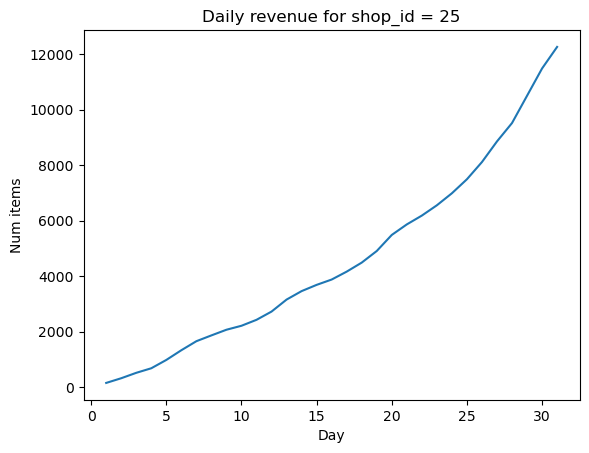

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [12]:
#shop_id = 25

#total_num_items_sold = # YOUR CODE GOES HERE
#days = # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()


#total_num_items_sold_var = # PUT YOUR ANSWER IN THIS VARIABLE

total_num_items_sold_var = np.var(total_num_items_per_day, ddof=1)
total_num_items_sold_var

grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [13]:
#STUDENT_EMAIL = # EMAIL HERE
#STUDENT_TOKEN = # TOKEN HERE

STUDENT_EMAIL = 'nazalekser@protonmail.com'
STUDENT_TOKEN = 'o5jBZPaE4y7AEKS2'


grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999957
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [14]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)